In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from collections import defaultdict
from itertools import combinations, chain
import functools
import operator
import copy
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [49]:
[file for file in sorted(os.listdir()) if (file.endswith('.txt')) and (file.startswith('Site')) and ('KSRev' in file)]

['Site1-KSRev-0field-NoPot.txt',
 'Site1-KSRev-0field-PDiff.txt',
 'Site1-KSRev-0field-Slater.txt',
 'Site1-KSRev-0field-noGuess.txt',
 'Site1-KSRev-planar-Slater.txt',
 'Site1-KSRev-planar-noGuess.txt',
 'Site1-KSRev-planar.txt',
 'Site1-KSRev-smallz-Slater.txt',
 'Site1-KSRev-smallz-noGuess.txt',
 'Site1-KSRev-smallz.txt',
 'Site2-KSRev-0field-NoPot.txt',
 'Site2-KSRev-0field-PDiff.txt',
 'Site2-KSRev-0field-Slater.txt',
 'Site2-KSRev-0field-noGuess.txt',
 'Site2-KSRev-planar-Slater.txt',
 'Site2-KSRev-planar-noGuess.txt',
 'Site2-KSRev-planar.txt',
 'Site2-KSRev-smallz-Slater.txt',
 'Site2-KSRev-smallz-noGuess.txt',
 'Site2-KSRev-smallz.txt',
 'Site3-KSRev-0field-NoPot.txt',
 'Site3-KSRev-0field-PDiff.txt',
 'Site3-KSRev-0field-Slater.txt',
 'Site3-KSRev-0field-noGuess.txt',
 'Site3-KSRev-planar-Slater.txt',
 'Site3-KSRev-planar-noGuess.txt',
 'Site3-KSRev-planar.txt',
 'Site3-KSRev-smallz-Slater.txt',
 'Site3-KSRev-smallz-noGuess.txt',
 'Site3-KSRev-smallz.txt']

In [36]:
for file in sorted(os.listdir()):
    if (file.endswith('.txt')) and (file.startswith('Site')) and ('KSRev' in file):
        print(file.split('-')[2].split('.')[0])

0field
0field
0field
0field
planar
planar
planar
smallz
smallz
smallz
0field
0field
0field
0field
planar
planar
planar
smallz
smallz
smallz
0field
0field
0field
0field
planar
planar
planar
smallz
smallz
smallz


In [61]:
vector_arrays = defaultdict(list)
for file in os.listdir():
    if (file.endswith('.txt')) and (file.startswith('Site')) and ('KSRev' in file):
        with open(file, 'r') as f:
            if file.split('-')[2].split('.')[0] + '-' + file.split('.')[0].split('-')[-1] in vector_arrays:
                line = [[float(num) for num in fileline.split()[:-1]] for fileline in f]
                vector_arrays[file.split('-')[2].split('.')[0]+ '-' + file.split('.')[0].split('-')[-1]].update({file.split('-')[0][-1] : line})
            else:
                vector_arrays[file.split('-')[2].split('.')[0] + '-' + file.split('.')[0].split('-')[-1]] = {file.split('-')[0][-1] : line}
                
# for i in [1,2,3]:
#     with open('Site'+str(i)+'-KSRev-0field-NoPot.txt', 'r') as f:
#         line = [[float(num) for num in fileline.split()[:-1]] for fileline in f]
#         vector_arrays[i] = line

Column 1 is $\frac{t}{U_0}$, while column 2 is $\frac{C}{U_0}$. New text files contain energies in the last column. Code will break since the zip merges all columns together. Need to remove the energy column to ensure correct coding behavior. 

In [67]:
dup_list = []
for k in vector_arrays.keys():
    if k.split('-')[0] == k.split('-')[-1]:
        dup_list.append(k)

for k in dup_list:
    vector_arrays[k.split('-')[0]] = vector_arrays.pop(k)

In [68]:
for k, v in vector_arrays.items():
    print(k)
    for k2, v2 in vector_arrays[k].items():
        print(k2)

smallz-noGuess
1
2
3
0field-noGuess
1
3
2
smallz-Slater
3
1
2
0field-PDiff
3
1
2
planar-noGuess
3
1
2
0field-Slater
1
2
3
planar-Slater
2
1
3
0field-NoPot
1
3
2
planar
1
2
3
smallz
1
2
3


In [164]:
index_dict = {'yz' : 2, 'xz':3, 'xy':4}

In [165]:
shortened_arrays = copy.deepcopy(new_dict)

In [166]:
shortened_arrays[1]

{'xy': [[0.01,
   2.49,
   1.5418640894589502e-17,
   -2.7372050559567528e-17,
   -0.3333333333333334],
  [0.01,
   2.48,
   1.5495318213705357e-17,
   -2.7514323634203466e-17,
   -0.3333333333333333],
  [0.01,
   2.47,
   1.557103833857805e-17,
   -2.765617413852112e-17,
   -0.33333333333333265],
  [0.01,
   2.46,
   1.5645966993832908e-17,
   -2.779774861869975e-17,
   -0.33333333333333354],
  [0.01,
   2.45,
   1.572025865027324e-17,
   -2.793919524829099e-17,
   -0.33333333333333365],
  [0.01,
   2.44,
   1.5794056155021036e-17,
   -2.808066016108272e-17,
   -0.3333333333333337],
  [0.01,
   2.43,
   1.5867490779363853e-17,
   -2.8222284938899383e-17,
   -0.3333333333333334],
  [0.01,
   2.42,
   1.5940682559164913e-17,
   -2.836420497710133e-17,
   -0.3333333333333331],
  [0.01,
   2.41,
   1.6013740832319834e-17,
   -2.850654851014941e-17,
   -0.33333333333333337],
  [0.01,
   2.4,
   1.6086764901036866e-17,
   -2.864943612714549e-17,
   -0.3333333333333333],
  [0.01,
   2.39,
  

In [169]:
shortened_arrays[1]

{'xy': [[0.01,
   2.49,
   1.5418640894589502e-17,
   -2.7372050559567528e-17,
   -0.3333333333333334],
  [0.01,
   2.48,
   1.5495318213705357e-17,
   -2.7514323634203466e-17,
   -0.3333333333333333],
  [0.01,
   2.47,
   1.557103833857805e-17,
   -2.765617413852112e-17,
   -0.33333333333333265],
  [0.01,
   2.46,
   1.5645966993832908e-17,
   -2.779774861869975e-17,
   -0.33333333333333354],
  [0.01,
   2.45,
   1.572025865027324e-17,
   -2.793919524829099e-17,
   -0.33333333333333365],
  [0.01,
   2.44,
   1.5794056155021036e-17,
   -2.808066016108272e-17,
   -0.3333333333333337],
  [0.01,
   2.43,
   1.5867490779363853e-17,
   -2.8222284938899383e-17,
   -0.3333333333333334],
  [0.01,
   2.42,
   1.5940682559164913e-17,
   -2.836420497710133e-17,
   -0.3333333333333331],
  [0.01,
   2.41,
   1.6013740832319834e-17,
   -2.850654851014941e-17,
   -0.33333333333333337],
  [0.01,
   2.4,
   1.6086764901036866e-17,
   -2.864943612714549e-17,
   -0.3333333333333333],
  [0.01,
   2.39,
  

In [70]:
u_dict = {}
v_dict = {}
w_dict = {}

In [79]:
for k, v in vector_arrays.items():
    for k2, v2 in vector_arrays[k].items():
        print(k, k2)

smallz-noGuess 1
smallz-noGuess 2
smallz-noGuess 3
0field-noGuess 1
0field-noGuess 3
0field-noGuess 2
smallz-Slater 3
smallz-Slater 1
smallz-Slater 2
0field-PDiff 3
0field-PDiff 1
0field-PDiff 2
planar-noGuess 3
planar-noGuess 1
planar-noGuess 2
0field-Slater 1
0field-Slater 2
0field-Slater 3
planar-Slater 2
planar-Slater 1
planar-Slater 3
0field-NoPot 1
0field-NoPot 3
0field-NoPot 2
planar 1
planar 2
planar 3
smallz 1
smallz 2
smallz 3


In [81]:
for k in vector_arrays:
    print(vector_arrays[k].keys())
        

dict_keys(['1', '2', '3'])
dict_keys(['1', '3', '2'])
dict_keys(['3', '1', '2'])
dict_keys(['3', '1', '2'])
dict_keys(['3', '1', '2'])
dict_keys(['1', '2', '3'])
dict_keys(['2', '1', '3'])
dict_keys(['1', '3', '2'])
dict_keys(['1', '2', '3'])
dict_keys(['1', '2', '3'])


In [82]:
u = {}
v = {}
w = {}

In [83]:
for k, _ in vector_arrays.items():
    for i in range(1,4):
        x, y, u[i], v[i], w[i] = zip(*vector_arrays[k][str(i)])
        if k in u_dict:
            u_dict[k].update({i : u[i]})
            v_dict[k].update({i : v[i]})
            w_dict[k].update({i : w[i]})
        else:
            u_dict[k] = {i : u[i]}
            v_dict[k] = {i : v[i]}
            w_dict[k] = {i : w[i]}
            

In [91]:
print(u_dict['0field-noGuess'][3])

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [93]:
u4_dict = {}
v4_dict = {}
w4_dict = {}
m4_dict = {}

In [95]:
for k, _ in vector_arrays.items():
    u4_dict[k] = np.add(np.add(u_dict[k][1], u_dict[k][2]), u_dict[k][3]) 
    v4_dict[k] = np.add(np.add(v_dict[k][1], v_dict[k][2]), v_dict[k][3]) 
    w4_dict[k] = np.add(np.add(w_dict[k][1], w_dict[k][2]), w_dict[k][3]) 

    m4_dict[k] = np.sqrt(np.power(u4_dict[k], 2) + np.power(v4_dict[k], 2) + np.power(w4_dict[k], 2) )

In [98]:
step_size = np.round(np.abs(y[0] - y[1]), 2)

In [175]:
len(x)

50000

In [176]:
len(y)

50000

In [177]:
min(x), max(x)

(0.01, 1.0)

In [178]:
min(y), max(y)

(-2.49, 2.49)

In [99]:
t_axis = np.arange(np.min(x), np.max(x) + step_size, step_size)
c_axis = np.arange(np.min(y) - step_size, np.max(y) + step_size, step_size)

In [102]:
mag_array = {}
u_array = {}
v_array = {}
w_array = {}

In [104]:
for k in vector_arrays.keys():
    mag_array[k] = np.reshape(m4_dict[k], [len(t_axis), len(c_axis)])
    u_array[k] = np.reshape(u4_dict[k], [len(t_axis), len(c_axis)])
    v_array[k] = np.reshape(v4_dict[k], [len(t_axis), len(c_axis)])
    w_array[k] = np.reshape(w4_dict[k], [len(t_axis), len(c_axis)])

In [110]:
array_dict = {}

for k in vector_arrays.keys():
    for i, array in enumerate([u_array[k], v_array[k], w_array[k], mag_array[k]]):
        if i == 0:
            array_dict[k] = {i : array}
        else:
            array_dict[k].update({i : array})

In [111]:
direction_dict = {}

for i, direction in enumerate(['x', 'y', 'z', '|m|']):
    direction_dict[i] = direction

In [108]:
np.max(array_dict['0field-noGuess'][0])

0.9505755430512546

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


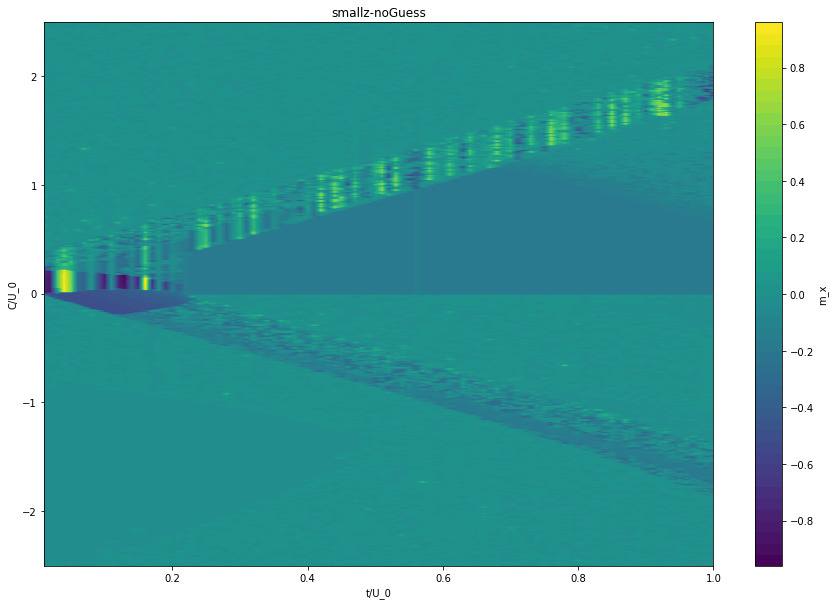

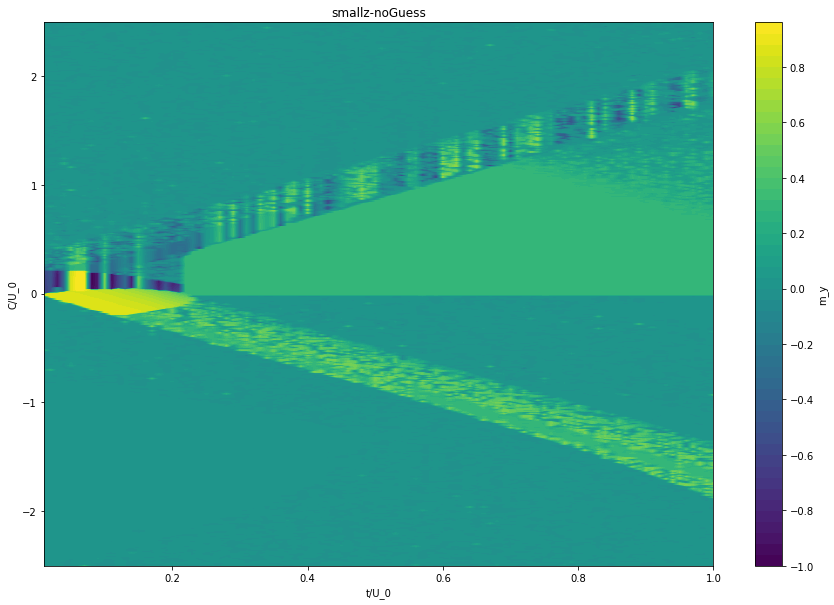

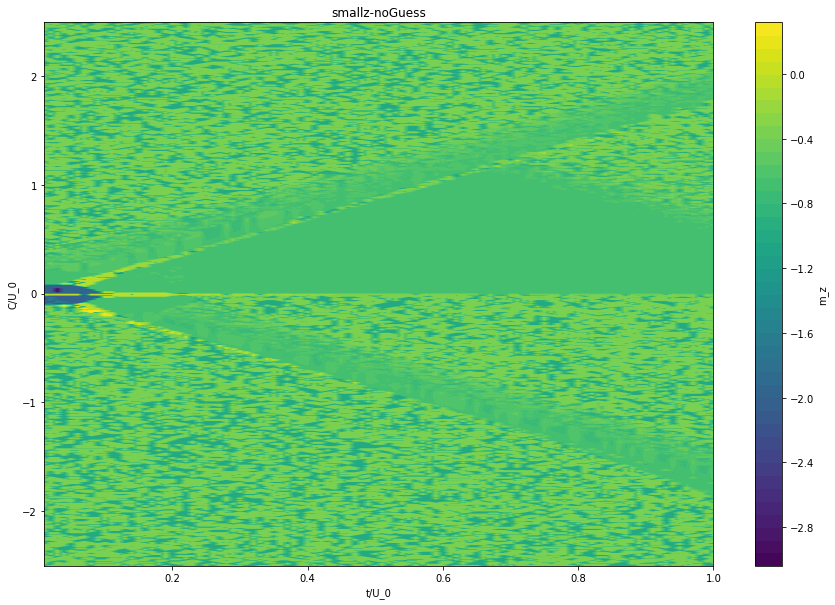

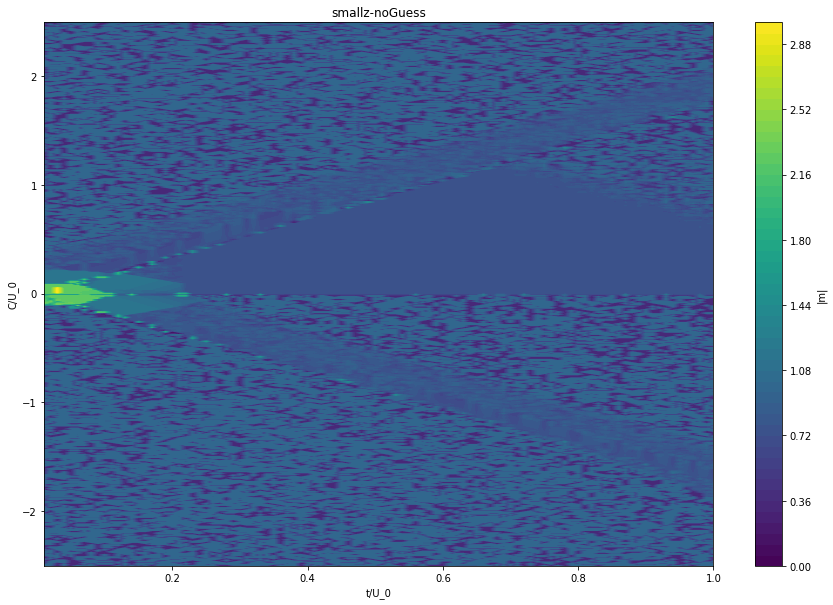

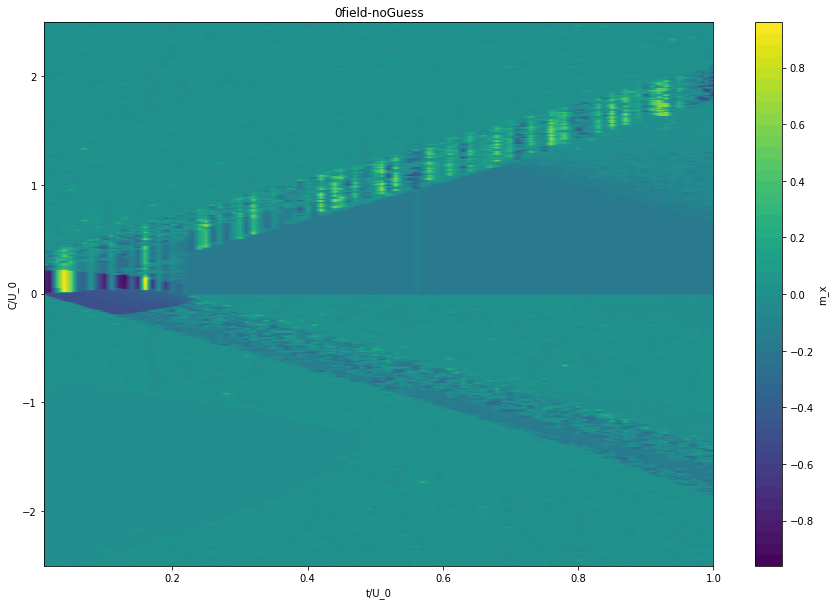

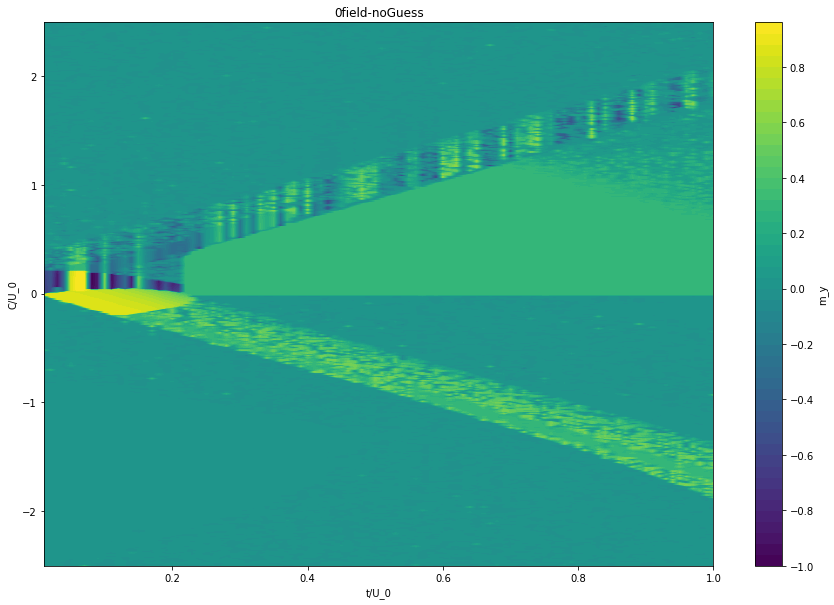

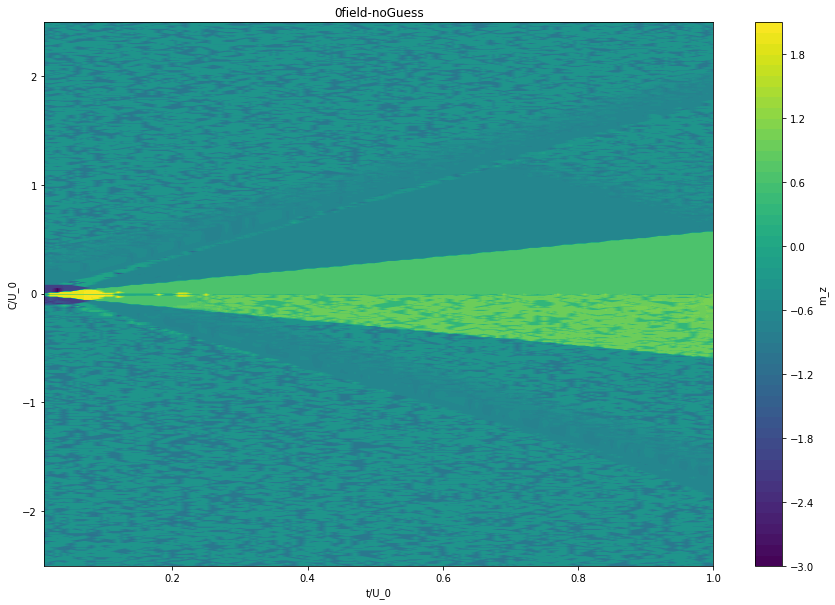

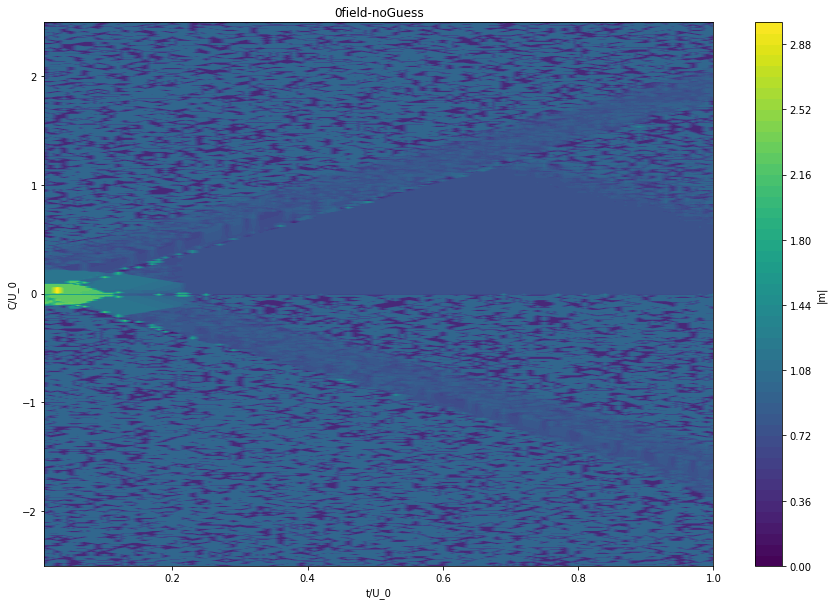

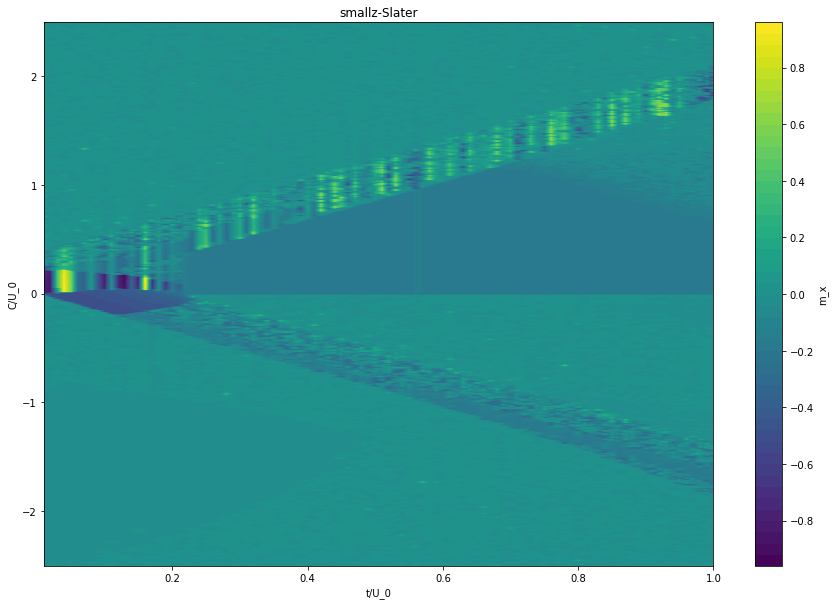

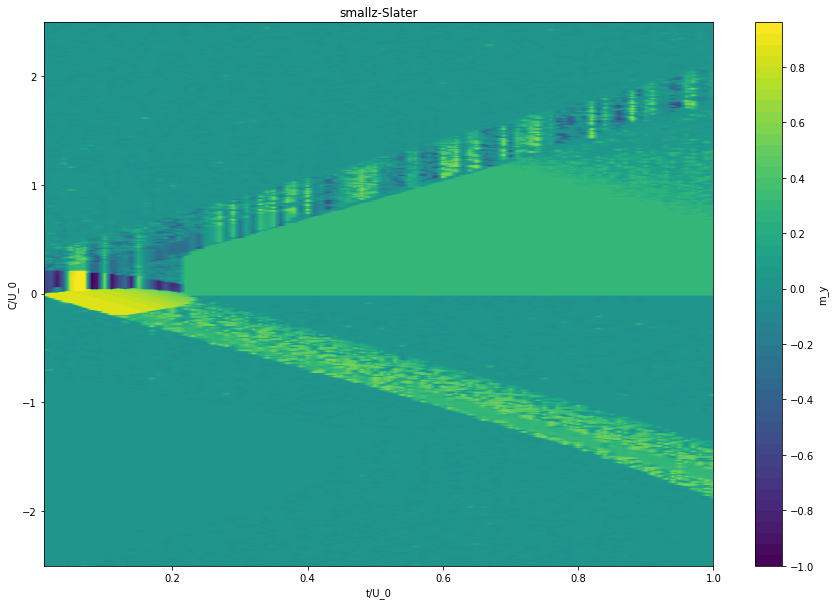

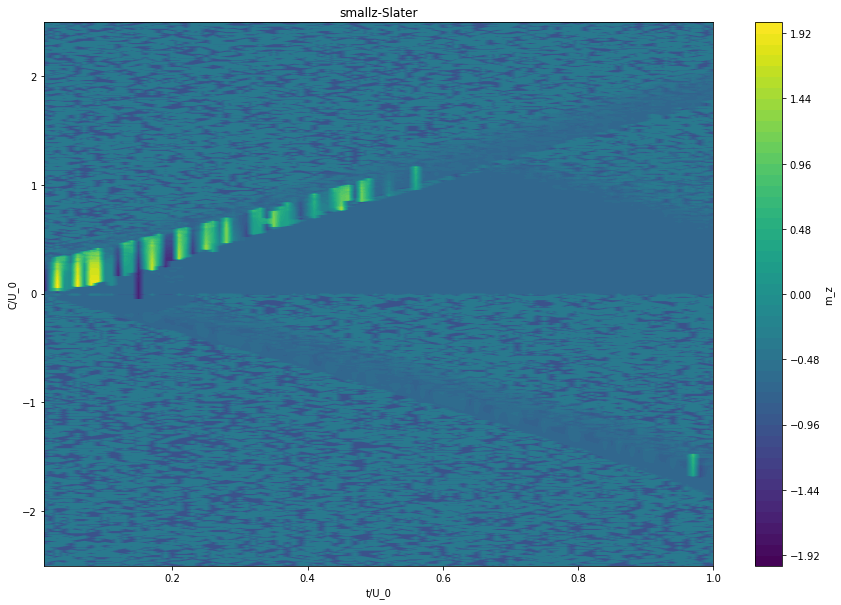

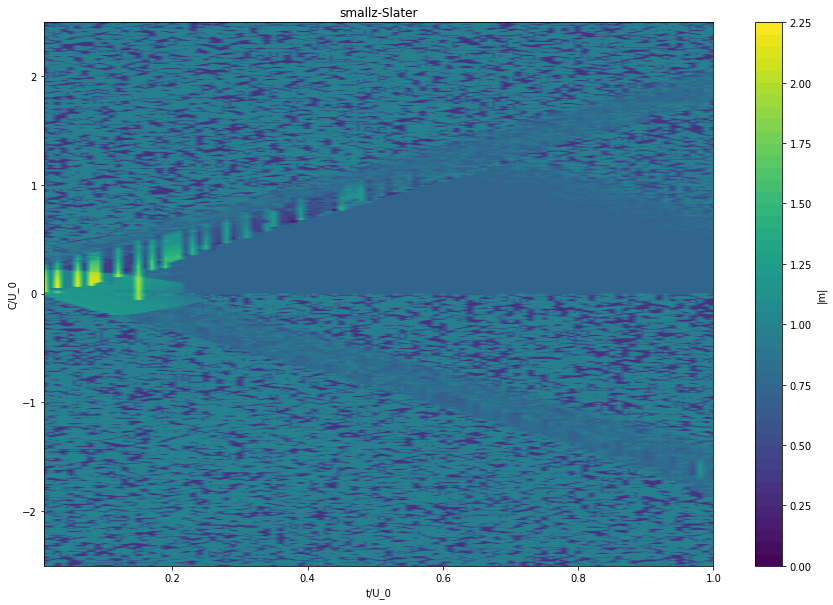

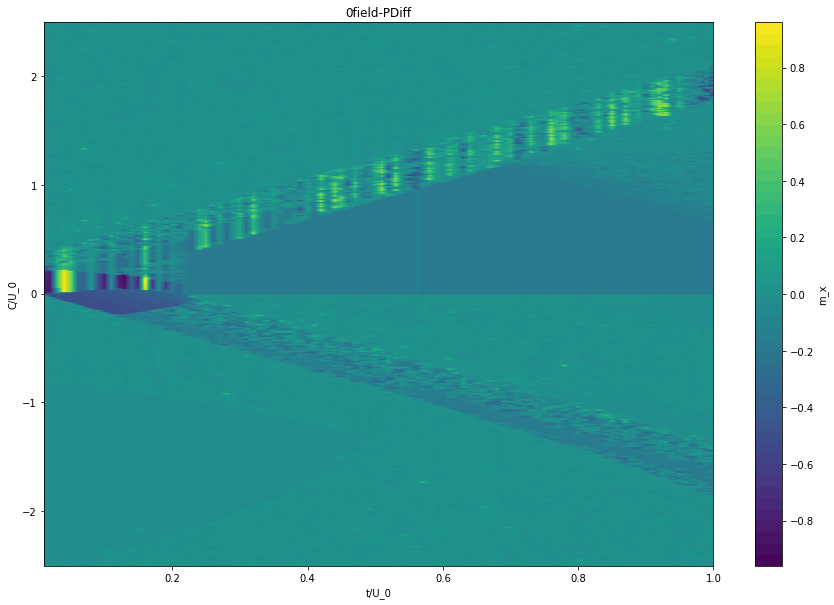

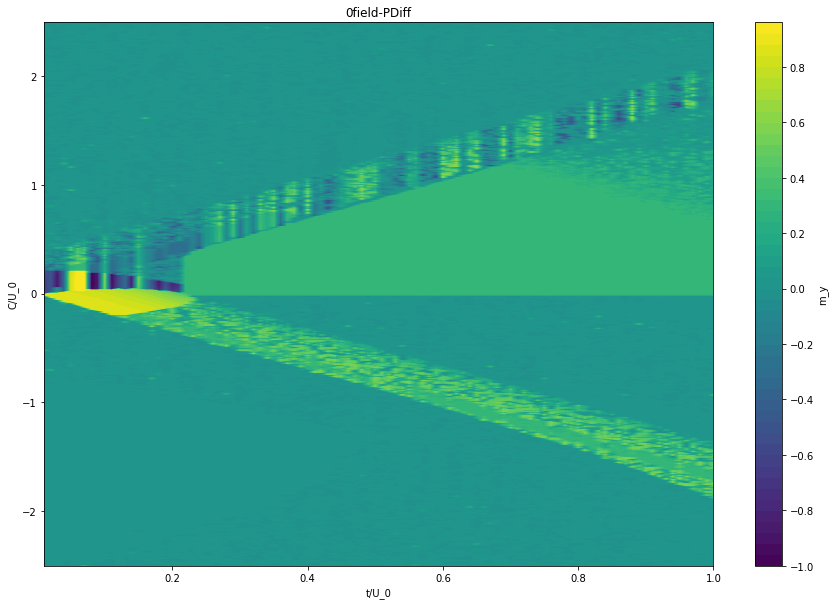

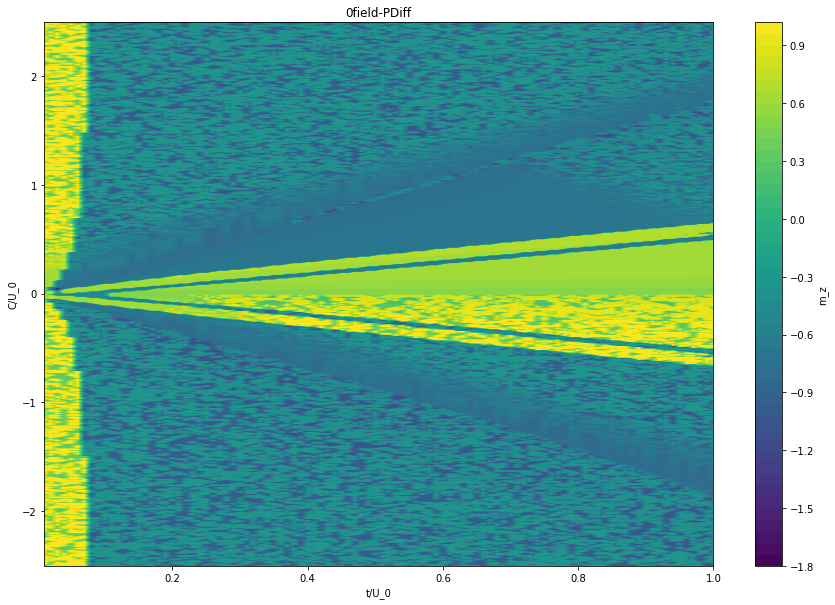

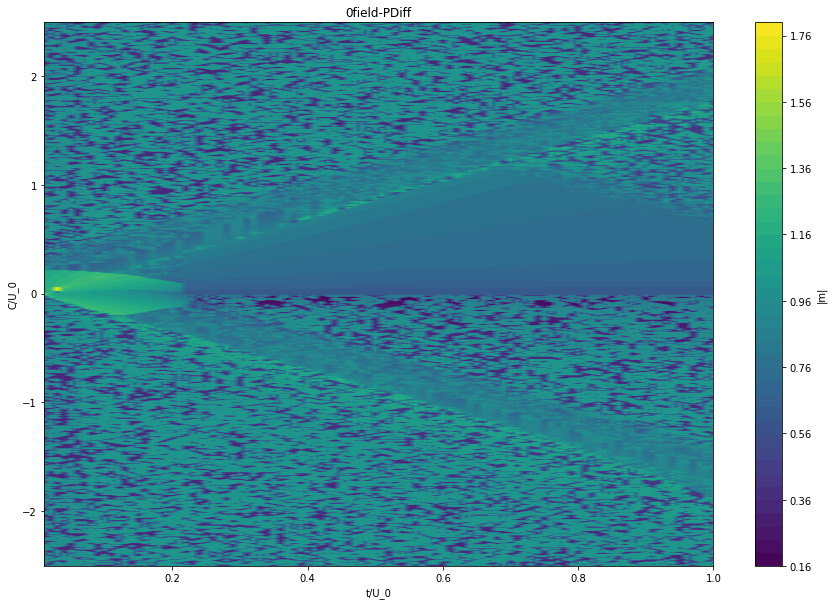

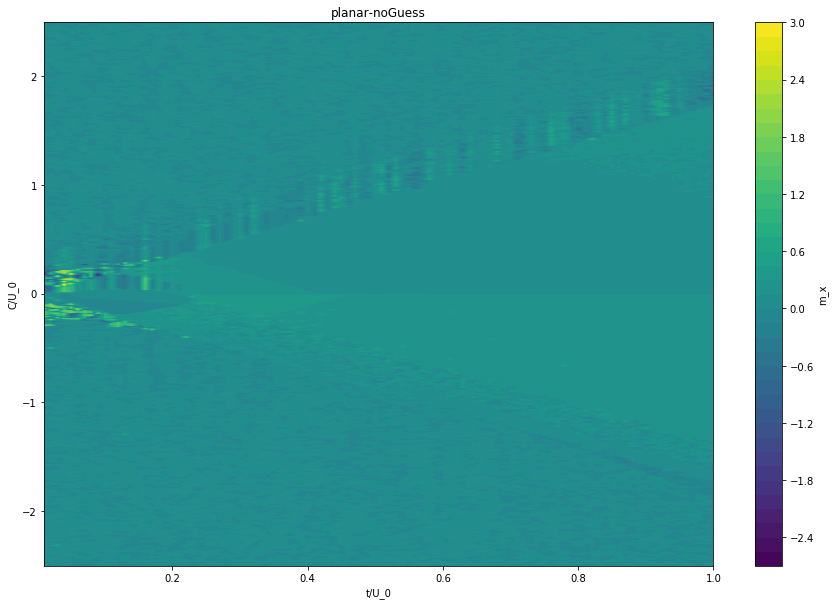

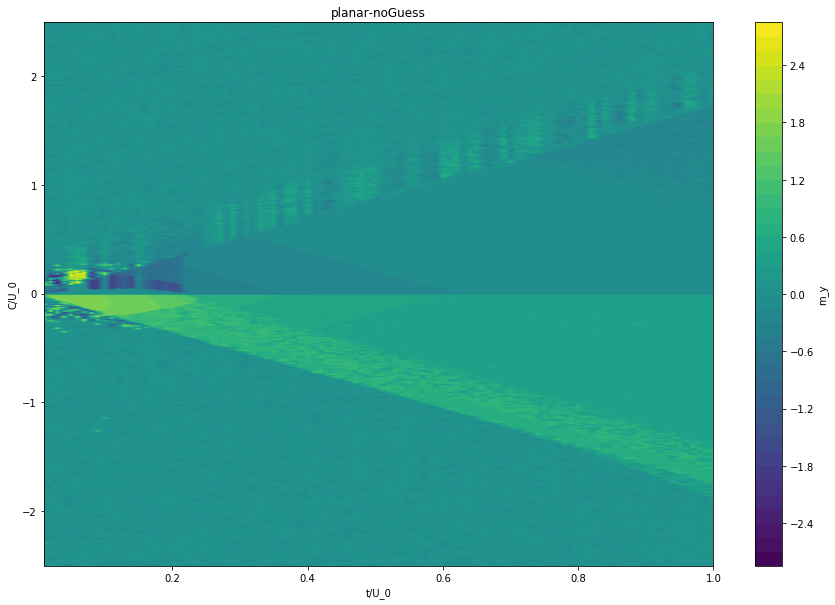

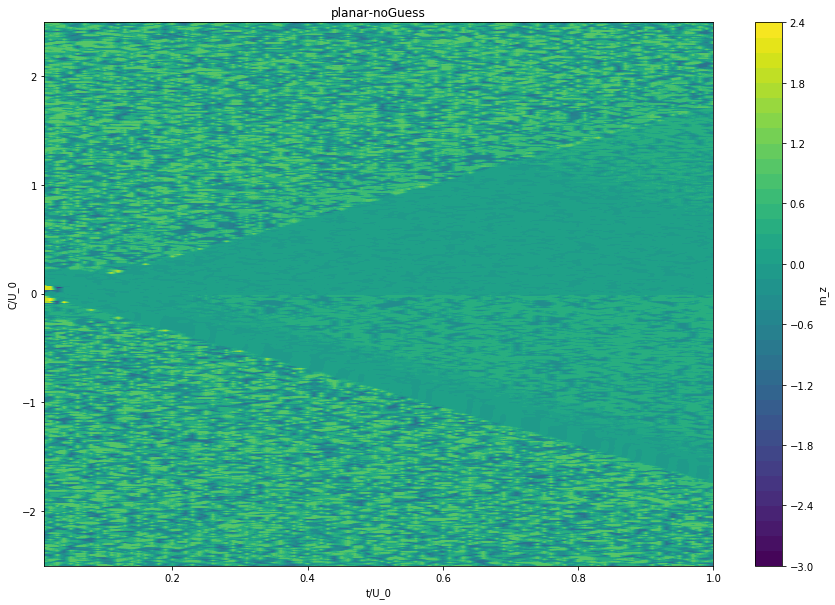

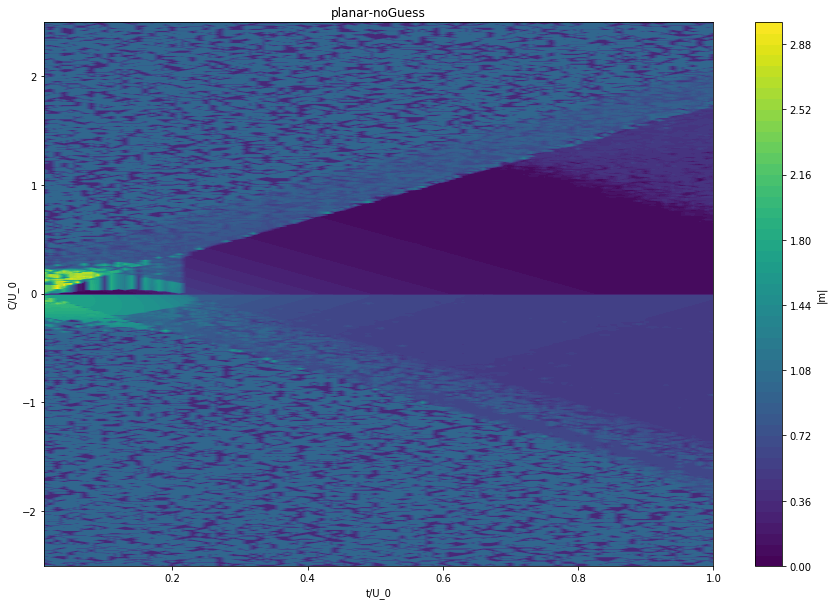

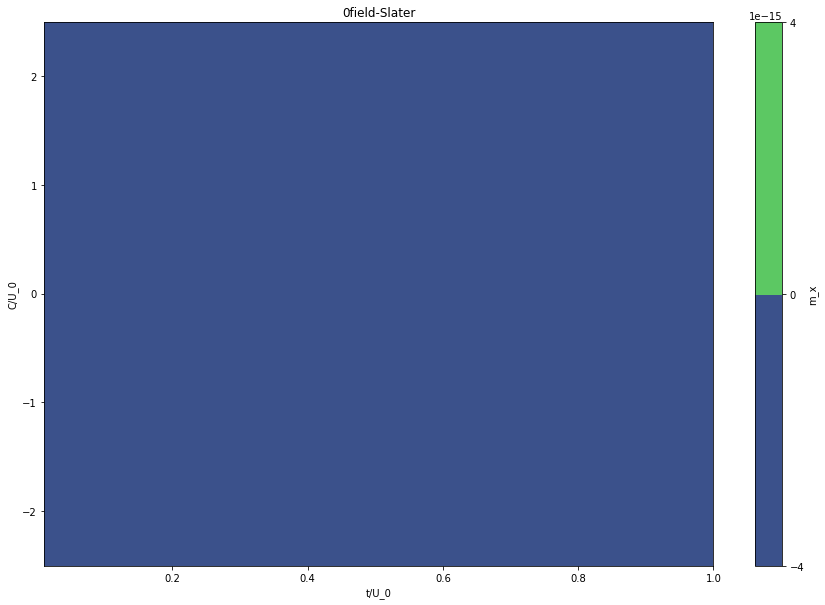

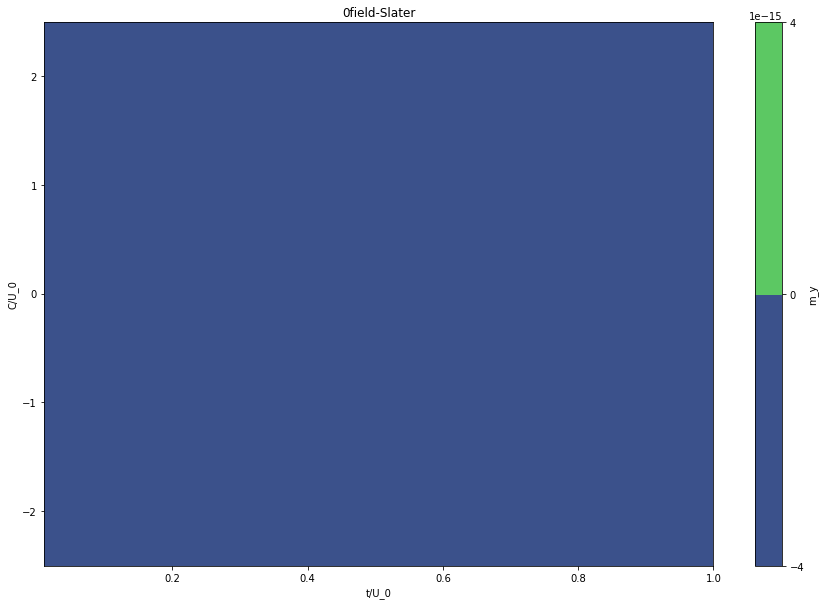

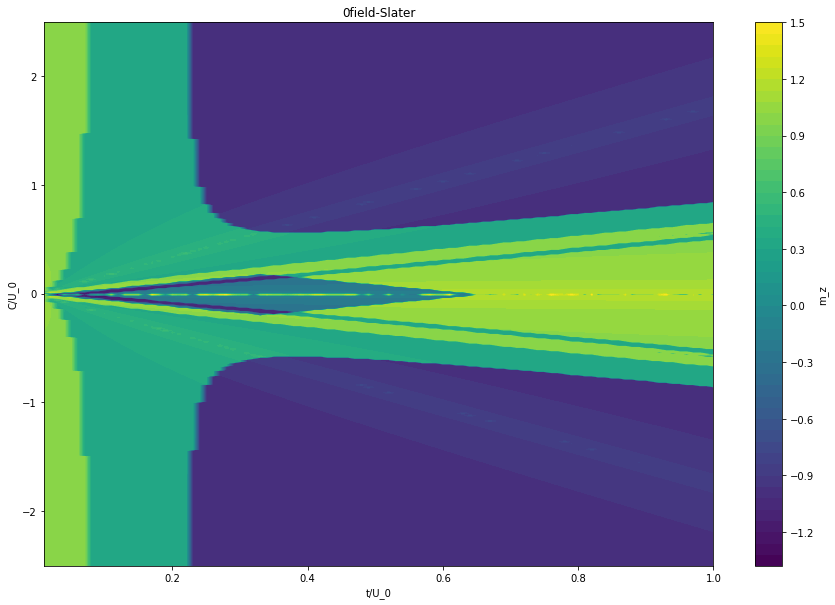

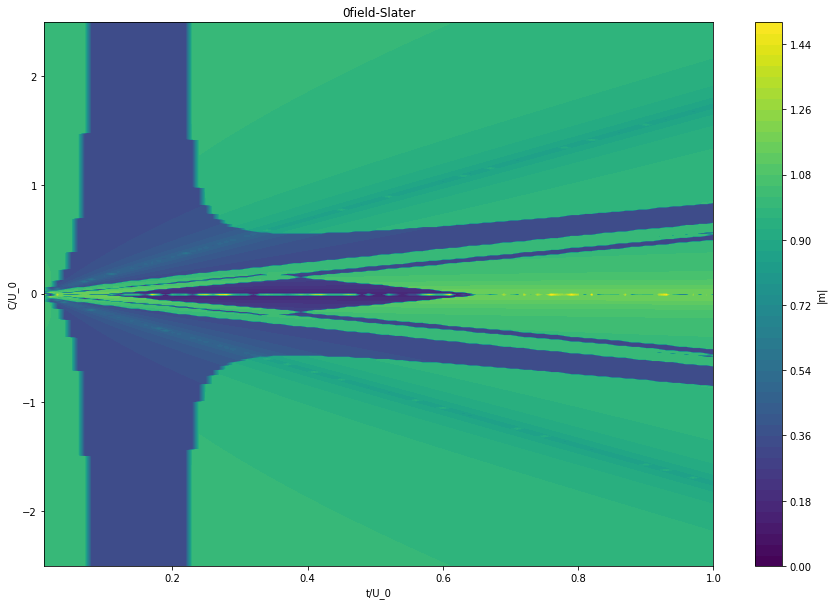

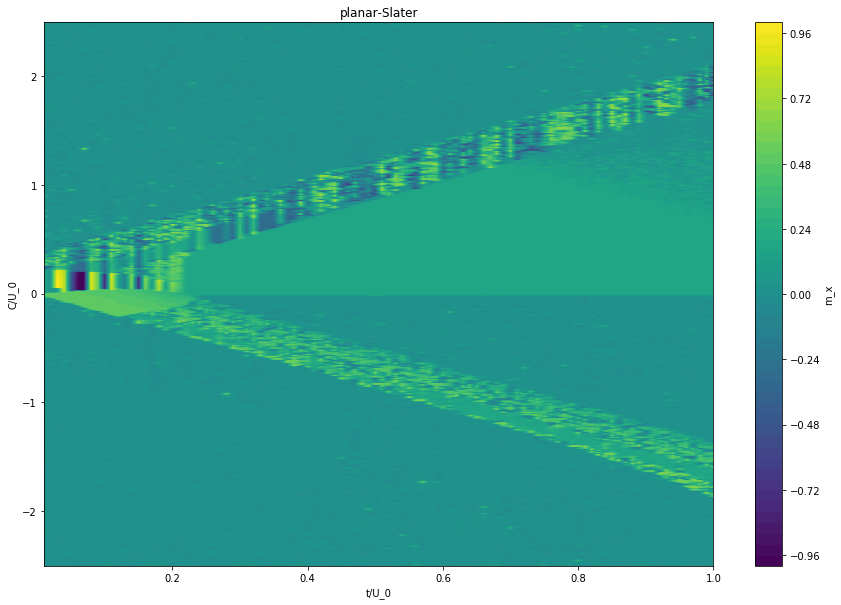

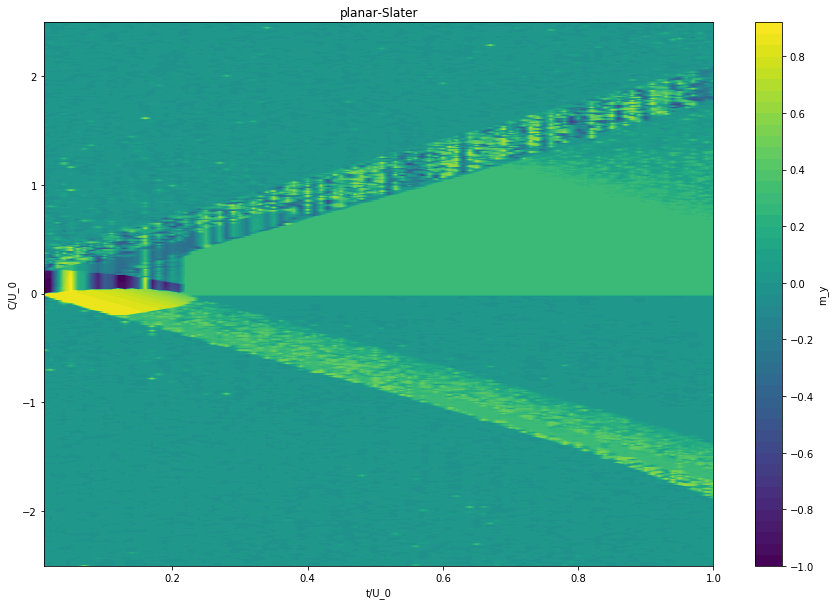

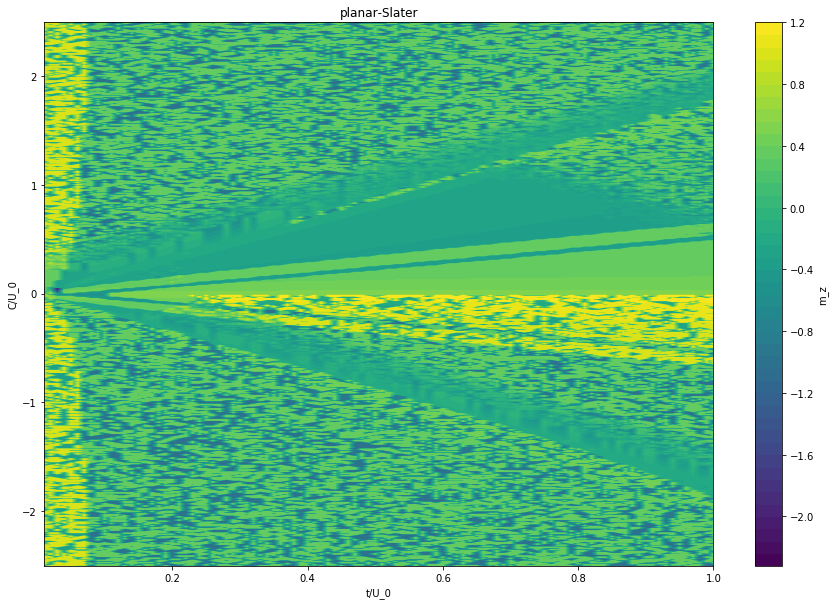

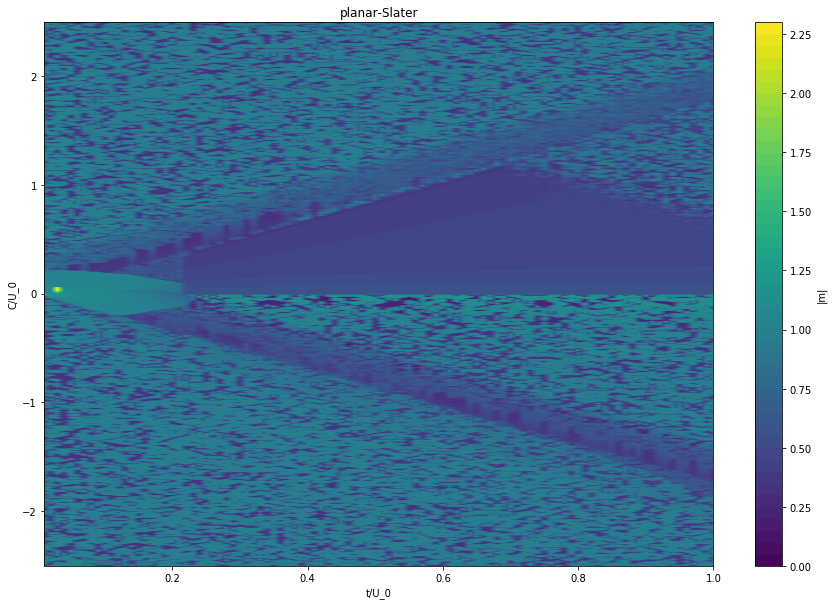

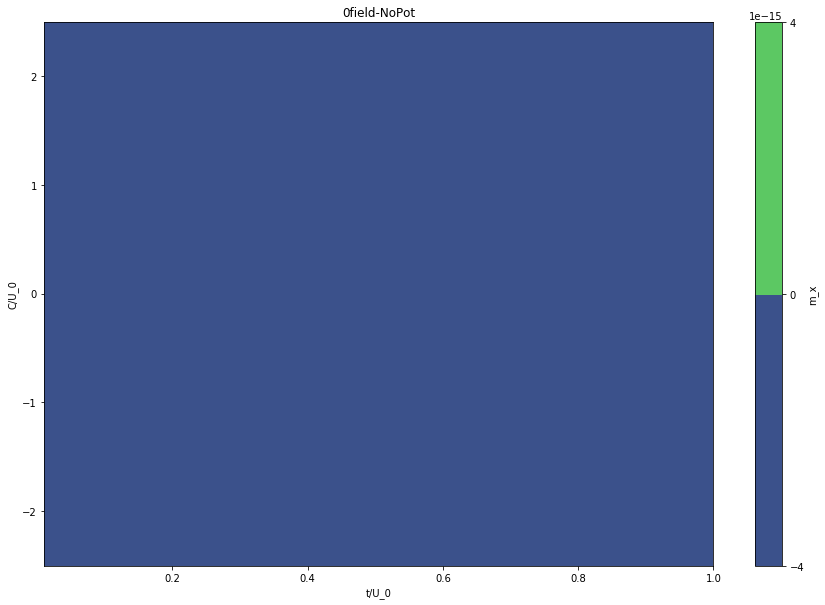

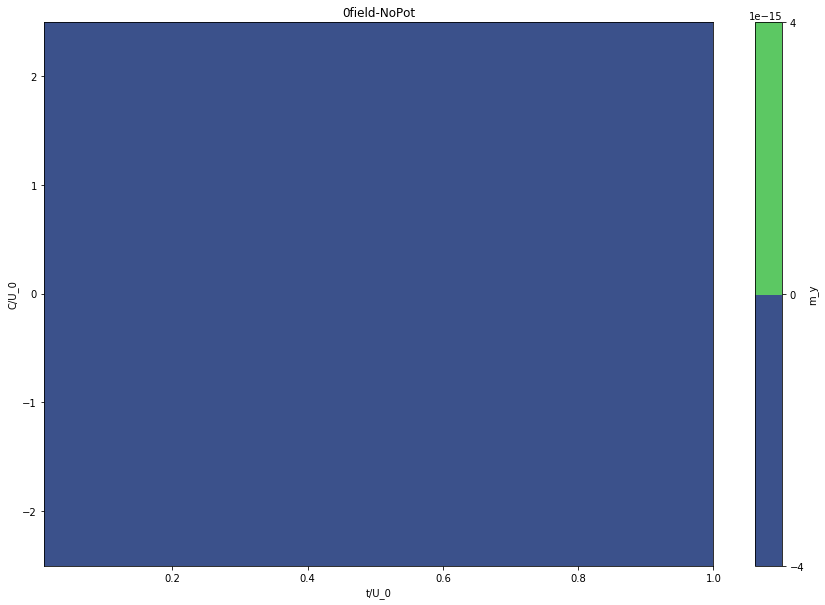

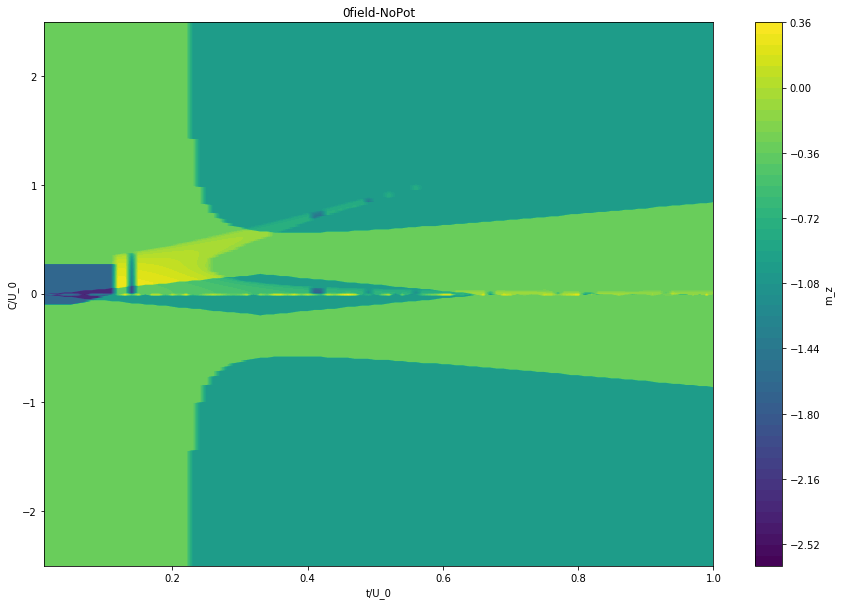

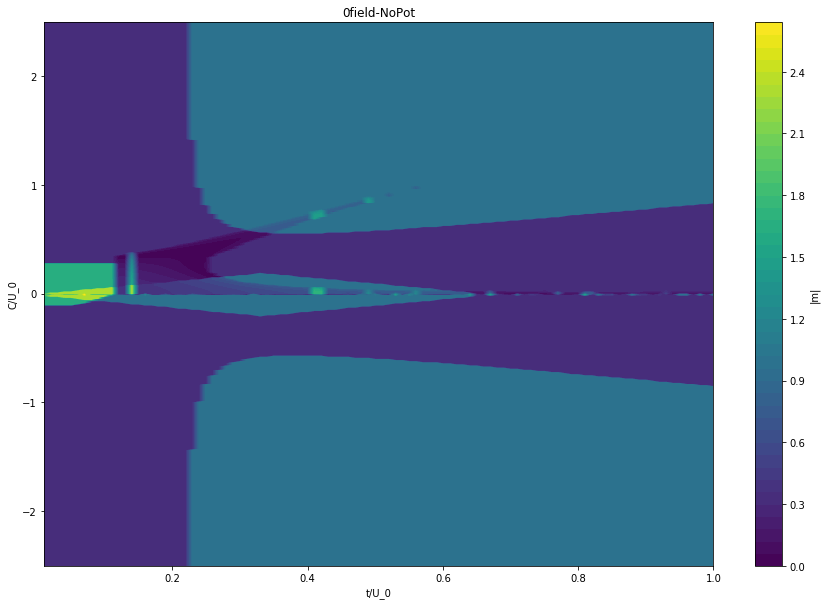

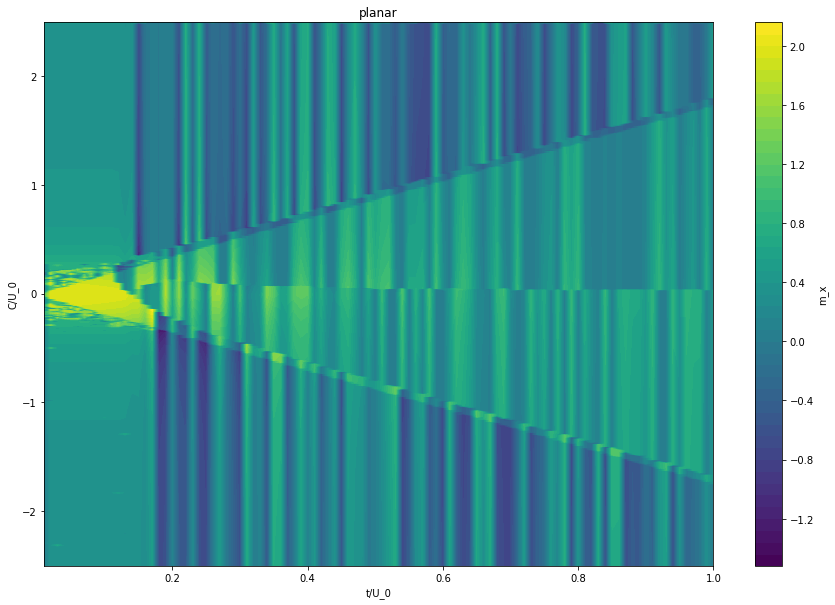

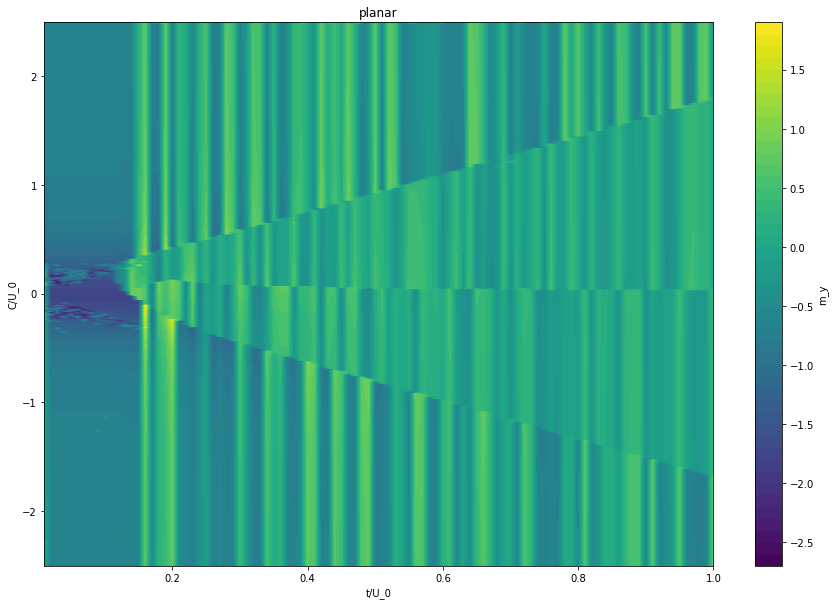

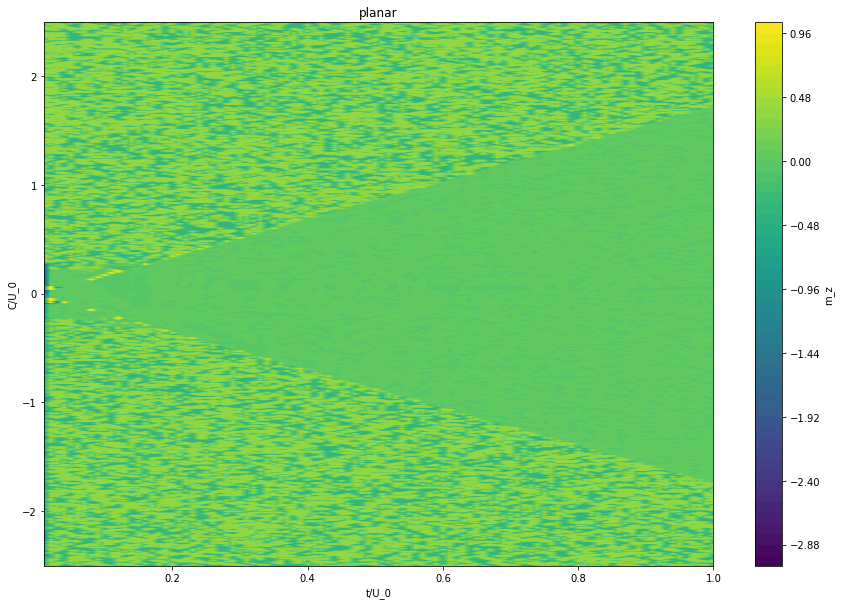

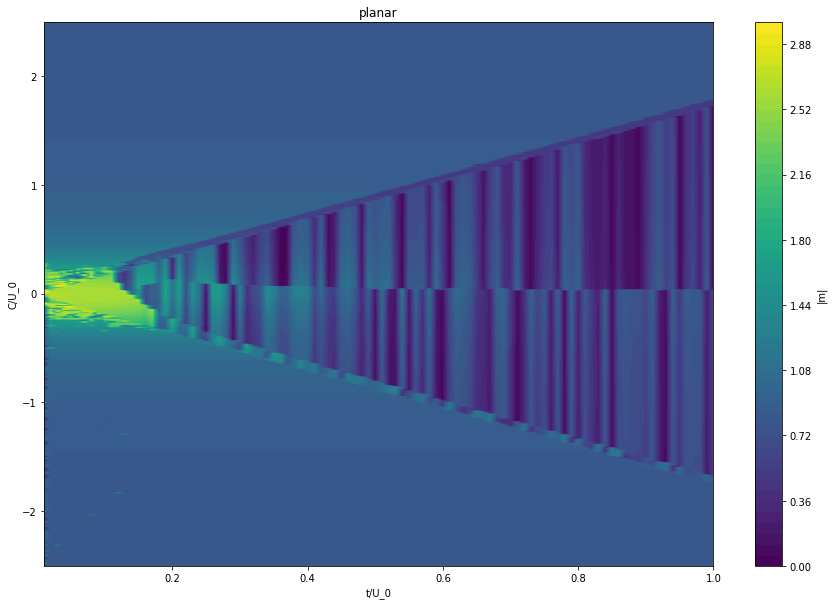

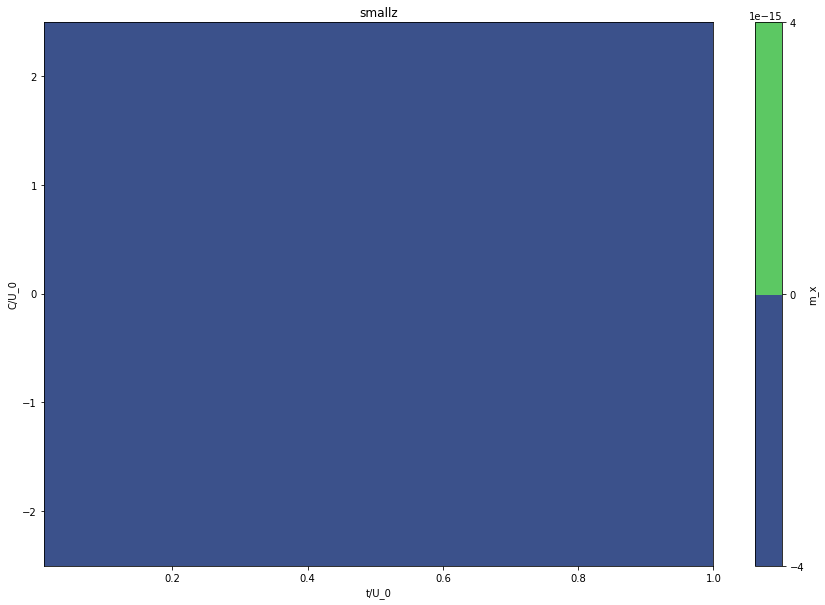

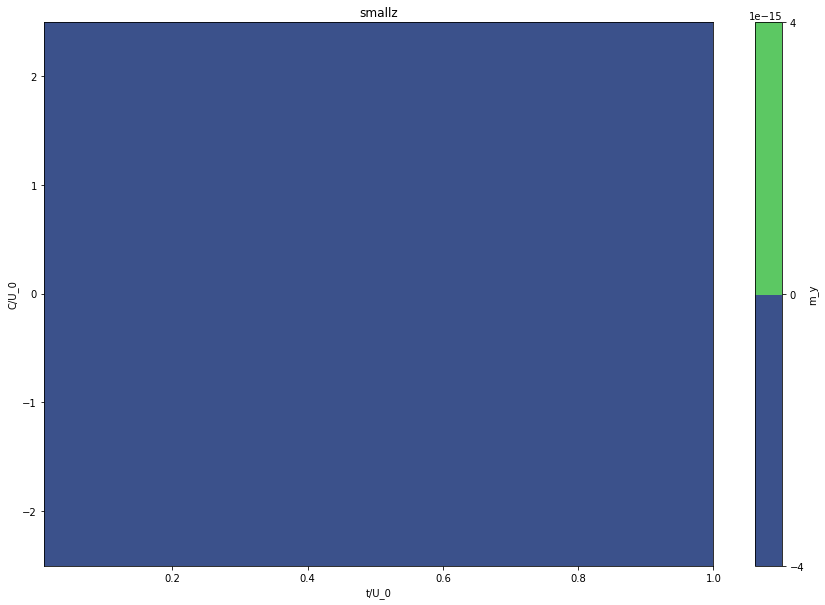

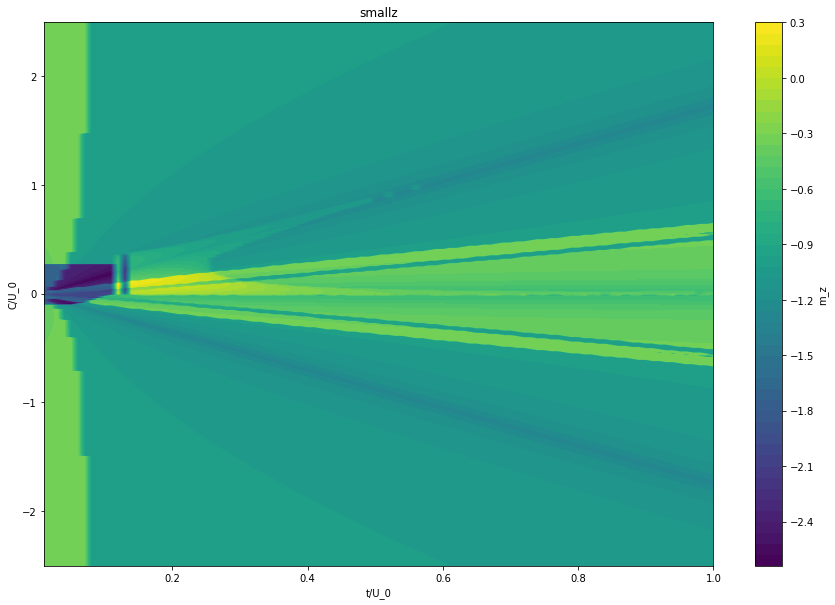

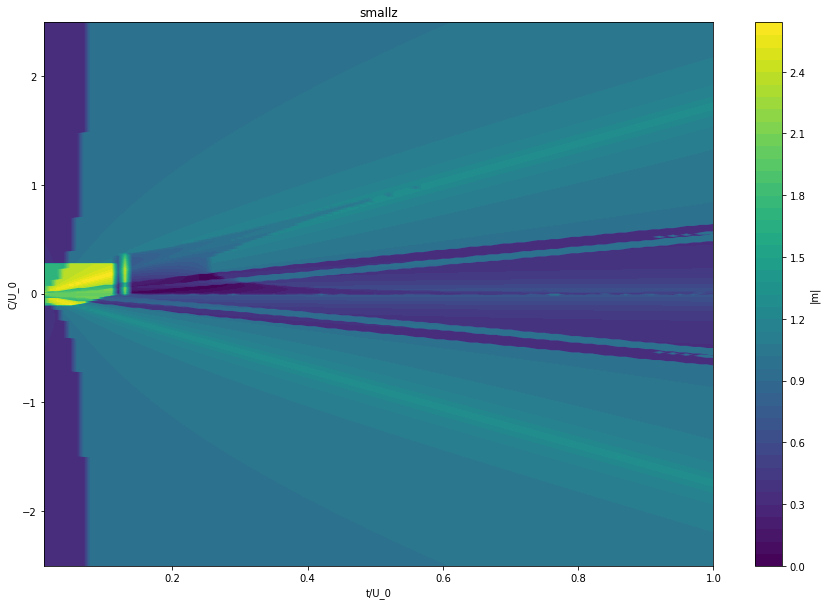

In [112]:
# fig = plt.figure(figsize=[20,15])
# ax = fig.add_subplot(111)
for k in vector_arrays.keys():
    for i in range(4):
        fig, axs = plt.subplots(1, figsize=[15, 10])
        vector_plot = axs.contourf(t_axis, c_axis, array_dict[k][i].T, levels=50)

        if i < 3:
            cbar = fig.colorbar(vector_plot, ax=axs).set_label('m_' + direction_dict[i])
        else:
            cbar = fig.colorbar(vector_plot, ax=axs).set_label(direction_dict[i])

        axs.set_ylabel('C/U_0')
        axs.set_xlabel('t/U_0')
        axs.set_title(str(k))


#        plt.savefig('Trimer_heatmap_' + direction_dict[i] + '.png')
    
    
plt.show()

